In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

working_dir = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection'
os.chdir(working_dir)

In [ ]:
!ls

bg_remove.py  Data  face_detection.ipynb  lfw_readme.csv  Red_necked_wallaby444.jpg  wallaby.png


In [ ]:
import cv2
import numpy as np

# Tải bộ phân loại Haar cascade đã được huấn luyện sẵn
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def extract_haar_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        print("No faces found in image!")

    features = []
    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        features.append(cv2.resize(roi, (50, 50)).flatten())

    return np.array(features)



< cv2.CascadeClassifier 0x7fdbf8b373d0>

In [ ]:
import os

# Đường dẫn tới thư mục chứa ảnh khuôn mặt và không khuôn mặt
face_dir = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/faces_24x24/'
non_face_dir = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/non_faces_24x24/'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Tải ảnh khuôn mặt và không khuôn mặt
face_images = load_images_from_folder(face_dir)
non_face_images = load_images_from_folder(non_face_dir)

# Gán nhãn cho ảnh khuôn mặt là 1 và không khuôn mặt là 0
face_labels = [1] * len(face_images)
non_face_labels = [0] * len(non_face_images)


In [ ]:
# Kiểm tra xem Haar Cascade có tải đúng không
if face_cascade.empty():
    print("Error: Haar Cascade file not loaded correctly.")


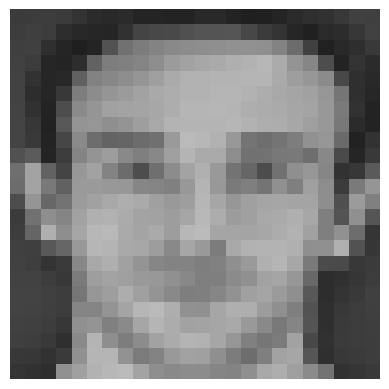

In [ ]:
import matplotlib.pyplot as plt

def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Hiển thị một số ảnh để kiểm tra
display_image(face_images[0])


In [ ]:
import cv2
import matplotlib.pyplot as plt

def extract_haar_features(image, scaleFactor=1.05, minNeighbors=2):
    if image is None:
        print("Error: Input image is None. Please check the image path.")
        return np.array([])

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)

    if len(faces) == 0:
        print("No faces found in image!")
        return np.array([])

    features = []
    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        resized_roi = cv2.resize(roi, (24, 24))
        features.append(resized_roi.flatten())

    return np.array(features)


# Ví dụ sử dụng trên một ảnh chân dung 24x24
test_image = cv2.imread('/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/faces_24x24/s10_1.png')
features = extract_haar_features(test_image)
print(f"Extracted features: {features}")


No faces found in image!
Extracted features: []


In [ ]:

# Trích xuất các đặc trưng từ hình ảnh khuôn mặt và không khuôn mặt
face_features = [extract_haar_features(img) for img in face_images]
non_face_features = [extract_haar_features(img) for img in non_face_images]

# Kiểm tra xem các đặc trưng đã được trích xuất thành công chưa
print(f"Face features shape: {np.array(face_features).shape}")
print(f"Non-face features shape: {np.array(non_face_features).shape}")

# Ghép nối dữ liệu và nhãn nếu có dữ liệu hợp lệ
if len(face_features) > 0 and len(non_face_features) > 0:
    X = np.concatenate((face_features, non_face_features), axis=0)
    y = np.array(face_labels + non_face_labels)
else:
    print("Error: No features were extracted.")

# Lưu ý: X và y cần phải được định dạng lại cho phù hợp với bộ phân loại kNN
X = np.vstack(X)  # Chuyển từ list các vector thành ma trận


In [ ]:
face_features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo bộ phân loại kNN và huấn luyện mô hình
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


ValueError: Found array with 0 feature(s) (shape=(640, 0)) while a minimum of 1 is required by KNeighborsClassifier.

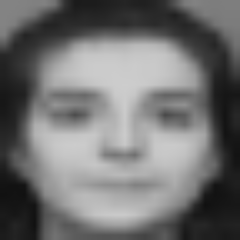

In [ ]:

import cv2
from google.colab.patches import cv2_imshow

# Tải mô hình Haar Cascade cho khuôn mặt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Đọc hình ảnh
image = cv2.imread('/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/faces_24x24/s10_10.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Phát hiện khuôn mặt
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Vẽ hình chữ nhật quanh khuôn mặt phát hiện
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Phóng to hình ảnh lên 240x240
resized_image = cv2.resize(image, (240, 240))
# Hiển thị kết quả
cv2_imshow(resized_image)



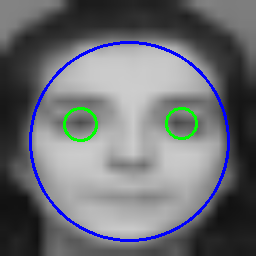

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Dùng để hiển thị ảnh trên Colab

# Tải các mô hình Haar Cascade cho khuôn mặt và mắt
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

# Hàm phát hiện khuôn mặt và mắt, sau đó vẽ lên ảnh
def detect_face_and_eyes(image):
    # Phóng to hình ảnh lên 64x64
    enlarged_image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_LINEAR)

    gray = cv2.cvtColor(enlarged_image, cv2.COLOR_BGR2GRAY)

    # Phát hiện khuôn mặt
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5)

    # Duyệt qua các khuôn mặt phát hiện được
    for (x, y, w, h) in faces:
        # Tính toán tâm và bán kính cho hình tròn khuôn mặt
        center_x, center_y = x + w//2, y + h//2
        radius = int(0.5 * (w + h) / 2)

        # Vẽ hình tròn quanh khuôn mặt
        cv2.circle(enlarged_image, (center_x, center_y), radius, (255, 0, 0), 2)

        # Lấy vùng ROI của khuôn mặt
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = enlarged_image[y:y+h, x:x+w]

        # Phát hiện đôi mắt trong vùng khuôn mặt
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)

        # Duyệt qua các đôi mắt phát hiện được và vẽ hình tròn xung quanh
        for (ex, ey, ew, eh) in eyes:
            # Tính toán tâm và bán kính cho hình tròn đôi mắt
            eye_center_x, eye_center_y = ex + ew//2, ey + eh//2
            eye_radius = int(0.3 * (ew + eh) / 2)

            # Vẽ hình tròn xung quanh đôi mắt
            cv2.circle(roi_color, (eye_center_x, eye_center_y), eye_radius, (0, 255, 0), 2)

    return enlarged_image

# Đọc ảnh từ đường dẫn
test_image_path = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/faces_24x24/s10_10.png'
test_image = cv2.imread(test_image_path)

# Kiểm tra nếu ảnh đã được tải thành công
if test_image is None:
    print(f"Error: Unable to load image at {test_image_path}")
else:
    # Phát hiện khuôn mặt và mắt, vẽ lên ảnh
    result_image = detect_face_and_eyes(test_image)

    # Hiển thị ảnh kết quả trên Colab
    cv2_imshow(result_image)

    # # Lưu ảnh kết quả nếu cần
    # cv2.imwrite('result_image.jpg', result_image)


Số lượng khuôn mặt phát hiện: 1


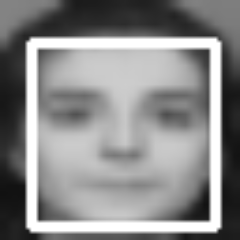

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files


# Đường dẫn đến mô hình Haar Cascade của bạn
face_cascade_path = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/haarcascade_frontalface_alt.xml'

# Tải mô hình Haar Cascade cho khuôn mặt
face_cascade = cv2.CascadeClassifier(face_cascade_path)

# Đọc hình ảnh
image = cv2.imread('/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/faces_24x24/s10_10.png')  # Thay đổi đường dẫn đến hình ảnh đã tải lên
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Phóng to hình ảnh lên 64x64 pixel
resized_image = cv2.resize(gray, (64, 64))

# Phát hiện khuôn mặt
faces = face_cascade.detectMultiScale(resized_image, scaleFactor=1.1, minNeighbors=3)

# In số lượng khuôn mặt phát hiện
print(f"Số lượng khuôn mặt phát hiện: {len(faces)}")

# Vẽ hình chữ nhật quanh khuôn mặt phát hiện
for (x, y, w, h) in faces:
    cv2.rectangle(resized_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Phóng to hình ảnh lên 240x240 để hiển thị
final_image = cv2.resize(resized_image, (240, 240))

# Hiển thị kết quả
cv2_imshow(final_image)


In [14]:
import cv2
import os
import numpy as np

# Đường dẫn đến các file Haar Cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/haarcascade_frontalface_alt.xml')

# Hàm trích xuất đặc trưng Haar từ ảnh
def extract_haar_features(image, size=(256, 256)):
    # Chuyển đổi ảnh sang grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Phát hiện khuôn mặt trong ảnh
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5)

    # Nếu phát hiện được khuôn mặt, trả về phần khuôn mặt cắt ra, nếu không, trả về ảnh grayscale
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            # Thay đổi kích thước khuôn mặt đã phát hiện về đúng kích thước chuẩn
            roi_gray = cv2.resize(roi_gray, size)
            return roi_gray.flatten()  # Trả về đặc trưng dưới dạng vector
    else:
        # Nếu không phát hiện được khuôn mặt, trả về ảnh xám có kích thước chuẩn
        resized_gray = cv2.resize(gray, size)
        return resized_gray.flatten()

# Hàm đọc dữ liệu từ các folder và gán nhãn
def load_dataset(folder_face, folder_non_face, size=(64, 64)):
    data = []
    labels = []

    # Duyệt qua thư mục chứa ảnh khuôn mặt
    for filename in os.listdir(folder_face):
        img_path = os.path.join(folder_face, filename)
        img = cv2.imread(img_path)
        if img is not None:
            features = extract_haar_features(img, size=size)
            data.append(features)
            labels.append(1)  # 1 cho ảnh có khuôn mặt

    # Duyệt qua thư mục chứa ảnh không có khuôn mặt
    for filename in os.listdir(folder_non_face):
        img_path = os.path.join(folder_non_face, filename)
        img = cv2.imread(img_path)
        if img is not None:
            features = extract_haar_features(img, size=size)
            data.append(features)
            labels.append(0)  # 0 cho ảnh không có khuôn mặt

    return np.array(data), np.array(labels)

# Đường dẫn đến folder dữ liệu
folder_face = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/faces_24x24'
folder_non_face = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/non_faces_24x24'

# Load dữ liệu
X, y = load_dataset(folder_face, folder_non_face)


In [17]:
X

array([[ 63,  63,  62, ...,  57,  58,  58],
       [ 33,  33,  36, ...,  36,  37,  37],
       [111, 111, 111, ...,  17,  18,  18],
       ...,
       [186, 187, 190, ...,  52,  48,  47],
       [  4,   4,   4, ...,  32,  33,  33],
       [222, 222, 222, ..., 151, 151, 151]], dtype=uint8)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình kNN: {accuracy * 100:.2f}%")


Độ chính xác của mô hình kNN: 96.88%


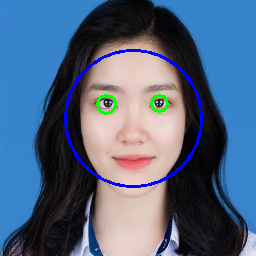

In [20]:
def detect_face_with_knn(image_path, knn_model, size=(256, 256)):
    img = cv2.imread(image_path)

    # Phóng to hình ảnh lên 64x64 để phát hiện khuôn mặt
    enlarged_image = cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(enlarged_image, cv2.COLOR_BGR2GRAY)

    # Phát hiện khuôn mặt
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5)

    # Duyệt qua các khuôn mặt phát hiện được
    for (x, y, w, h) in faces:
        # Tính toán tâm và bán kính cho hình tròn khuôn mặt
        center_x, center_y = x + w // 2, y + h // 2
        radius = int(0.5 * (w + h) / 2)

        # Vẽ hình tròn quanh khuôn mặt
        cv2.circle(enlarged_image, (center_x, center_y), radius, (255, 0, 0), 2)

        # Lấy vùng ROI của khuôn mặt
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = enlarged_image[y:y+h, x:x+w]

        # Phát hiện đôi mắt trong vùng khuôn mặt
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)

        # Duyệt qua các đôi mắt phát hiện được và vẽ hình tròn xung quanh
        for (ex, ey, ew, eh) in eyes:
            # Tính toán tâm và bán kính cho hình tròn đôi mắt
            eye_center_x, eye_center_y = ex + ew // 2, ey + eh // 2
            eye_radius = int(0.3 * (ew + eh) / 2)

            # Vẽ hình tròn xung quanh đôi mắt
            cv2.circle(roi_color, (eye_center_x, eye_center_y), eye_radius, (0, 255, 0), 2)

    # Hiển thị ảnh kết quả
    cv2_imshow(enlarged_image)
    return enlarged_image

# Sử dụng hàm phát hiện khuôn mặt
image_path = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/Data/Test/091609-thumb-15222092411420-ds-770.jpg'
result_image = detect_face_with_knn(image_path, knn)

# # Lưu ảnh kết quả nếu cần
# cv2.imwrite('result_image_with_faces_and_eyes.jpg', result_image)


In [21]:
import joblib

# Giả sử knn là mô hình đã được huấn luyện
# Đường dẫn lưu mô hình
model_path = '/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/knn_model.pkl'

# Lưu mô hình kNN vào file
joblib.dump(knn, model_path)

# Kiểm tra file đã được lưu
print(f"Mô hình đã được lưu vào {model_path}")


Mô hình đã được lưu vào /content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/knn_model.pkl


In [22]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [23]:
import streamlit as st
import cv2
import numpy as np
from PIL import Image

# Tải mô hình kNN đã huấn luyện
# Giả sử bạn đã lưu mô hình kNN vào file 'knn_model.pkl'
import joblib
knn_model = joblib.load('knn_model.pkl')

# Đường dẫn đến file Haar Cascade cho mặt và mắt
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Lap_trinh_ung_dung_voi_OpenCV/Face_detection/haarcascade_eye_tree_eyeglasses.xml')

# Hàm trích xuất và phát hiện khuôn mặt
def detect_faces_and_eyes(image):
    # Chuyển đổi ảnh thành màu xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Phát hiện khuôn mặt
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5)

    # Duyệt qua từng khuôn mặt phát hiện
    for (x, y, w, h) in faces:
        # Vẽ hình tròn quanh khuôn mặt
        cv2.circle(image, (x + w // 2, y + h // 2), int(0.5 * (w + h) / 2), (255, 0, 0), 2)

        # Vùng khuôn mặt
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]

        # Phát hiện đôi mắt
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)

        # Duyệt qua các đôi mắt và vẽ hình tròn quanh chúng
        for (ex, ey, ew, eh) in eyes:
            cv2.circle(roi_color, (ex + ew // 2, ey + eh // 2), int(0.3 * (ew + eh) / 2), (0, 255, 0), 2)

    return image

# Giao diện Streamlit
st.title("Ứng dụng phát hiện khuôn mặt")
st.write("Tải lên hình ảnh của bạn để phát hiện khuôn mặt và đôi mắt.")

uploaded_file = st.file_uploader("Chọn ảnh", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Đọc và hiển thị ảnh
    image = Image.open(uploaded_file)
    image = np.array(image)

    # Phát hiện khuôn mặt và đôi mắt
    result_image = detect_faces_and_eyes(image)

    # Hiển thị ảnh kết quả
    st.image(result_image, caption='Ảnh với khuôn mặt và mắt được phát hiện', use_column_width=True)


2024-09-29 10:19:20.467 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 10:19:20.655 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-29 10:19:20.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 10:19:20.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 10:19:20.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 10:19:20.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 10:19:20.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 10:19:20.669 Thread 'MainThread': mi